# Analysis of LSOA results

## Proportions of stroke types: Analysis of SAMueL data

Data from SAMueL using NIHSS 11+ as a surrogate for LVO:

| Admission type                       | All arrivals | Arrival within 6 hrs known onset | Arrival within 4 hrs known onset |
|--------------------------------------|--------------|----------------------------------|----------------------------------|
| Proportion all admissions            | 100          | 42.9                             | 37.1                             |
| Proportion haemorrhagic              | 11.5         | 13.6                             | 14.1                             |
| Proportion ischaemic                 | 88.5         | 86.4                             | 85.9                             |
| Proportion ischaemic with NIHSS 0-10 | 74.9         | 67.4                             | 65.7                             |
| Proportion ischaemic with NIHSS 11+  | 25.1         | 32.6                             | 34.3                             |

For original analysis see: https://samuel-book.github.io/samuel-1/descriptive_stats/10_using_nihss_10_for_lvo.html

## Set analysis parameters

In [1]:
file_name = 'lsoa_base'
limit_to_england = True

stroke_type_propotions = {
    'haemorragic': 0.136,
    'lvo': 0.33 * (1 - 0.136),
    'nlvo': 0.67 * (1 - 0.136)}

In [2]:
target_ivt = 0.2
target_mt = 0.1
prop_mt_previously_receiving_ivt = 0.85

prop_lvo_receiving_mt = target_mt / stroke_type_propotions['lvo']
print(f'{prop_lvo_receiving_mt:0.3f}')

0.351


In [3]:
prop_lvo_receiving_ivt = prop_lvo_receiving_mt * prop_mt_previously_receiving_ivt
print(f'{prop_lvo_receiving_ivt:0.3f}')

0.298


In [4]:
prop_nlvo_receiving_ivt = (
    (target_ivt - (prop_lvo_receiving_ivt * stroke_type_propotions['lvo'])) / 
    stroke_type_propotions['nlvo'])

print(f'{prop_nlvo_receiving_ivt:0.3f}')

0.199


In [5]:
# Check sums
prop_all_receiving_ivt = (
    (stroke_type_propotions['nlvo'] * prop_nlvo_receiving_ivt) +
    (stroke_type_propotions['lvo'] * prop_lvo_receiving_ivt))

print(f'{prop_all_receiving_ivt:0.3f}')

0.200


## Import packages

In [6]:
import contextily as ctx
import geopandas
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option('display.max_rows', 150)

## Load data

### Load shape file

In [10]:
filename = "zip://./data/Lower_layer_super_output_areas_(E+W)_2011_Boundaries_(Generalised_Clipped)_V2.zip"
lsoa_gdf = geopandas.read_file(filename, crs='EPSG:27700')
lsoa_gdf.head()

,LSOA11CD,LSOA11NM,LSOA11NMW,geometry
0,E01000001,City of London 001A,City of London 001A,"POLYGON ((532105.092 182011.230, 532162.491 18..."
1,E01000002,City of London 001B,City of London 001B,"POLYGON ((532746.813 181786.891, 532671.688 18..."
2,E01000003,City of London 001C,City of London 001C,"POLYGON ((532135.145 182198.119, 532158.250 18..."
3,E01000005,City of London 001E,City of London 001E,"POLYGON ((533807.946 180767.770, 533649.063 18..."
4,E01000006,Barking and Dagenham 016A,Barking and Dagenham 016A,"POLYGON ((545122.049 184314.931, 545271.917 18..."


### Load hospital info

In [7]:
hospitals = pd.read_csv('./data/stroke_hospitals_2022.csv')

### Load LSOA model output data

In [8]:
lsoa_data = pd.read_csv(f'./output/{file_name}.csv')
lsoa_data.head(3).T

,0,1,2
lsoa,Adur 001A,Adur 001B,Adur 001C
closest_ivt_unit,BN25BE,BN25BE,BN112DH
closest_ivt_time,17.6,18.7,17.6
closest_mt_unit,BN25BE,BN25BE,BN25BE
closest_mt_time,17.6,18.7,19.8
transfer_mt_unit,BN25BE,BN25BE,BN25BE
transfer_mt_time,0.0,0.0,31.6
mt_transfer_required,False,False,True
msu_unit,BN25BE,BN25BE,BN25BE
msu_time,17.6,18.7,19.8


In [16]:
# Merge with shape file

#lsoa_data_gdf = lsoa_data.merge(lsoa_gdf, left_on='lsoa', right_on='LSOA11NM', how='left')
lsoa_data_gdf = lsoa_gdf.merge(lsoa_data, left_on='LSOA11NM', right_on='lsoa', how='left')
lsoa_data_gdf.head()

,LSOA11CD,LSOA11NM,LSOA11NMW,geometry,lsoa,closest_ivt_unit,closest_ivt_time,closest_mt_unit,closest_mt_time,transfer_mt_unit,...,mothership_lvo_ivt_mean_mRS,mothership_lvo_mt_mean_mRS,mothership_nlvo_ivt_mean_mRS,mothership_lvo_ivt_mean_shift,mothership_lvo_mt_mean_shift,mothership_nlvo_ivt_mean_shift,mothership_lvo_ivt_improved,mothership_lvo_mt_improved,mothership_nlvo_ivt_improved,Admissions_Est_2022
0,E01000001,City of London 001A,City of London 001A,"POLYGON ((532105.092 182011.230, 532162.491 18...",City of London 001A,E11BB,11.2,E11BB,11.2,E11BB,...,3.48,2.77,1.72,-0.16,-0.87,-0.57,0.17,0.76,0.57,2.965686
1,E01000002,City of London 001B,City of London 001B,"POLYGON ((532746.813 181786.891, 532671.688 18...",City of London 001B,E11BB,10.1,E11BB,10.1,E11BB,...,3.48,2.76,1.72,-0.16,-0.88,-0.57,0.17,0.77,0.57,1.318083
2,E01000003,City of London 001C,City of London 001C,"POLYGON ((532135.145 182198.119, 532158.250 18...",City of London 001C,E11BB,12.2,E11BB,12.2,E11BB,...,3.48,2.77,1.72,-0.16,-0.87,-0.57,0.17,0.76,0.57,2.306645
3,E01000005,City of London 001E,City of London 001E,"POLYGON ((533807.946 180767.770, 533649.063 18...",City of London 001E,E11BB,9.0,E11BB,9.0,E11BB,...,3.48,2.76,1.72,-0.16,-0.88,-0.57,0.17,0.77,0.57,0.659041
4,E01000006,Barking and Dagenham 016A,Barking and Dagenham 016A,"POLYGON ((545122.049 184314.931, 545271.917 18...",Barking and Dagenham 016A,RM70AG,16.5,RM70AG,16.5,RM70AG,...,3.48,2.80,1.72,-0.16,-0.84,-0.57,0.17,0.75,0.57,1.318083


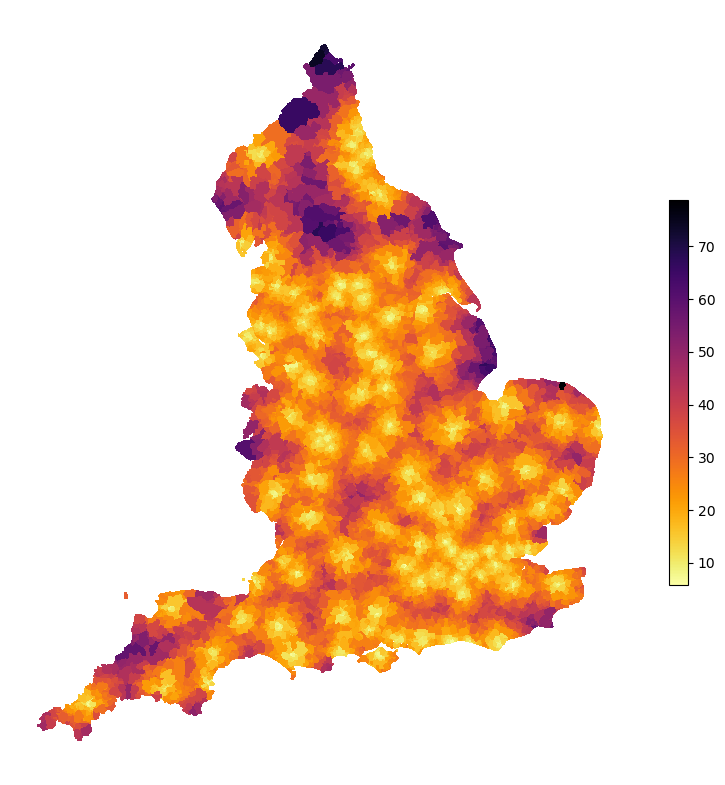

In [27]:
fig, ax = plt.subplots(figsize=(10, 10)) # Make max dimensions 10x10 inch
lsoa_data_gdf.plot(ax=ax, # Set which axes to use for plot (only one here)
                 column='closest_ivt_time',#'mothership_lvo_ivt_added_utility', # Column to apply colour
                 antialiased=False, # Avoids artifact boundry lines
                 edgecolor='face', # Make LSOA boundry same colour as area
                 #vmin=0, # Manual scale min (remove to make automatic)
                 #vmax=70, # Manual scale max (remove to make automatic)
                 cmap='inferno_r', # Colour map to use
                 # Adjust size of colourmap key, and add label
                 legend_kwds={'shrink':0.5, 'label':''},
                 # Set to display legend
                 legend=True)
ax.set_axis_off() # Turn of axis linea dn numbers
#plt.savefig('map.jpg', dpi=300) # Save figure
plt.show()

In [21]:
mask = lsoa_data_gdf['mothership_lvo_ivt_added_utility'] < 0
mask.sum()

1

In [23]:
lsoa_data_gdf[mask].T

,26092
LSOA11CD,E01026781
LSOA11NM,North Norfolk 005C
LSOA11NMW,North Norfolk 005C
geometry,"POLYGON ((620190.5370009256 342792.7209999193,..."
lsoa,North Norfolk 005C
closest_ivt_unit,NR47UY
closest_ivt_time,78.8
closest_mt_unit,CB20QQ
closest_mt_time,246.4
transfer_mt_unit,CB20QQ
